# **Advanced Regression Assignment**


**Problem Statement:**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, to determine the optimal value of lambda for ridge and lasso regression.


 

**Essentially, the company wants:** 

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# **Steps are:**
1. Reading, understanding and visualising the data.
2. Preparing the data for modelling (train-test split, rescaling etc.,)
3. Training the model
4. Predictions and evaluation on the test set.

# **Reading and understanding the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings. filterwarnings('ignore')

In [2]:
# read the data
housing = pd.read_csv("https://raw.githubusercontent.com/DevalapalleJaswanth/housingData/main/train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Removing columns which have 70% of null values and removing Id column which is just a sequence number. 
arr=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
for col in arr:
  housing.pop(col) 

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [6]:
housing.fillna("Not Available", inplace = True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [18]:
housing.head

<bound method NDFrame.head of       MSSubClass MSZoning LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL        65.0     8450   Pave      Reg         Lvl   
1             20       RL        80.0     9600   Pave      Reg         Lvl   
2             60       RL        68.0    11250   Pave      IR1         Lvl   
3             70       RL        60.0     9550   Pave      IR1         Lvl   
4             60       RL        84.0    14260   Pave      IR1         Lvl   
...          ...      ...         ...      ...    ...      ...         ...   
1455          60       RL        62.0     7917   Pave      Reg         Lvl   
1456          20       RL        85.0    13175   Pave      Reg         Lvl   
1457          70       RL        66.0     9042   Pave      Reg         Lvl   
1458          20       RL        68.0     9717   Pave      Reg         Lvl   
1459          20       RL        75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlop

In [19]:
housing.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   443.639726    46.549315   567.240411  1057.429452  ...   
std       20.645407   456.098091   161.319273   441.866955   438.705324  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%     1994.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     2004.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max     2010.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

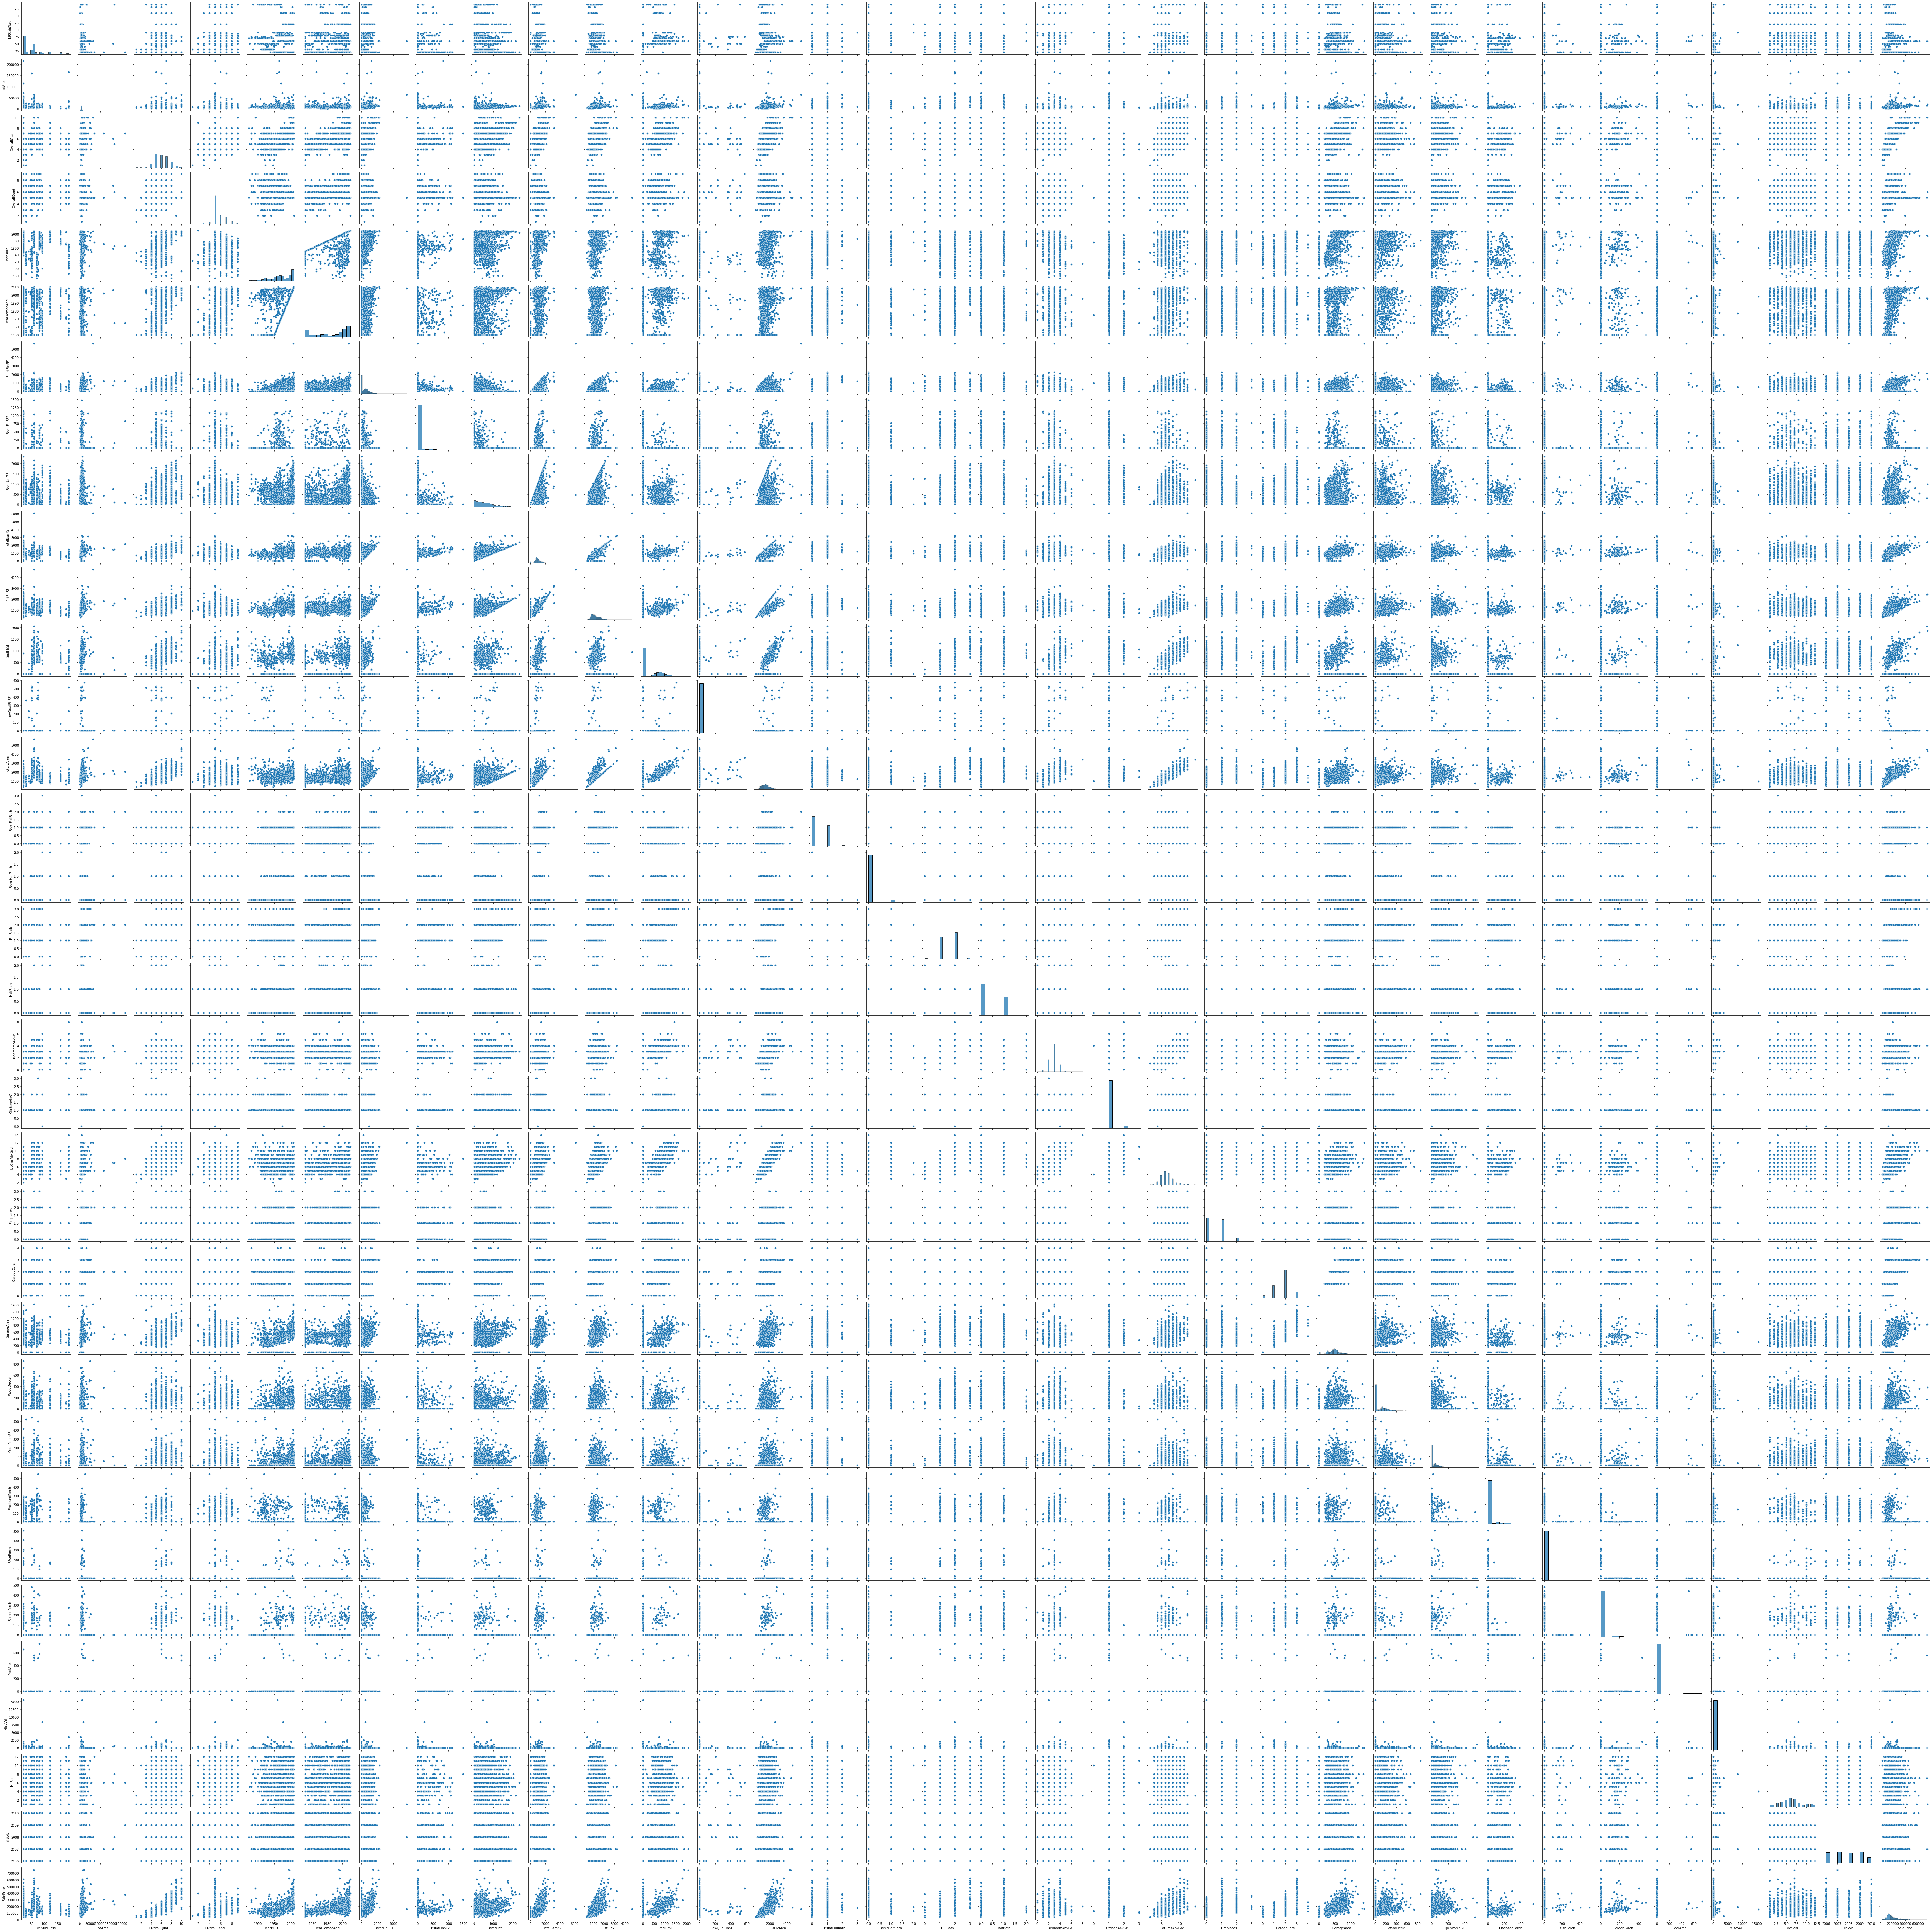

In [88]:
# visualising the numeric
sns.pairplot(housing)
plt.show()

### **Observations:**


**Note:** we can see that below variables show **positive** correlation with  "**SalePrice**"

1. **TotalBsmtSF**: Total square feet of basement area
2. **FullBath:** Full bathrooms above grade
3. **Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)
4. **Kitchen:** Kitchens above grade
5. **OverallCond:** Rates the overall condition of the house
6. **OverallQual:** Rates the overall material and finish of the house
7. **YearBuilt:** Original construction date
8. **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)
9. **1stFlrSF:** First Floor square feet 
10. **2ndFlrSF:** Second floor square feet
11. **Fireplaces:** Number of fireplaces
12. **LotArea:** Lot size in square feet
13. **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
14. **GarageArea:** Size of garage in square feet
15. **GrLivArea:** Above grade (ground) living area square feet

**Note:** we can see that below variables show **negative** correlation with  "**SalePrice**"

16. **MSSubClass:** Identifies the type of dwelling involved in the sale.
17. **BsmtUnfSF:** Unfinished square feet of basement area 
18. **PoolArea:** Pool area in square feet
19. **BsmtFullBath:** Basement full bathrooms
20. **BsmtHalfBath:** Basement half bathrooms
21. **HalfBath:** Half baths above grade
22. **MiscVal:** $Value of miscellaneous feature






In [26]:
nummeric_columns_list = ['TotalBsmtSF','MSSubClass','BsmtUnfSF','PoolArea','BsmtFullBath','BsmtHalfBath','HalfBath',
                         'GrLivArea','Fireplaces','GarageArea','TotRmsAbvGrd','LotArea',
                         '2ndFlrSF','1stFlrSF','YearRemodAdd','YearBuilt','OverallQual','OverallCond','KitchenAbvGr',
                         'BedroomAbvGr','FullBath','MiscVal','SalePrice']
nummeric_columns_list


['TotalBsmtSF',
 'MSSubClass',
 'BsmtUnfSF',
 'PoolArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'TotRmsAbvGrd',
 'LotArea',
 '2ndFlrSF',
 '1stFlrSF',
 'YearRemodAdd',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'FullBath',
 'MiscVal',
 'SalePrice']

In [27]:
categorical_columns_list = list(housing.select_dtypes(include=['object']).columns)
categorical_columns_list

['MSZoning',
 'LotFrontage',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

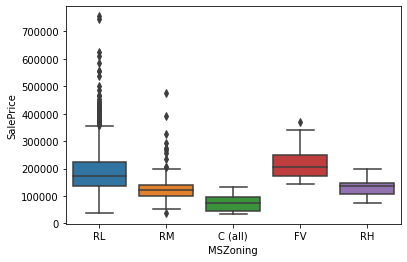

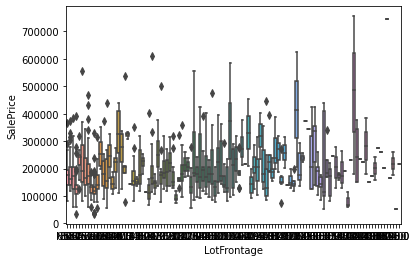

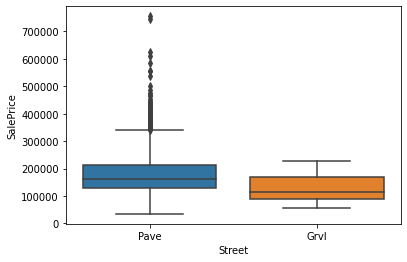

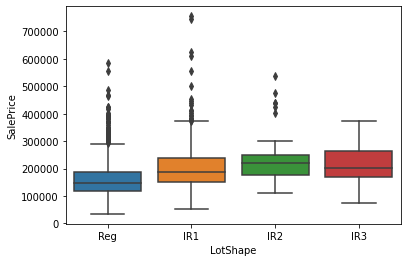

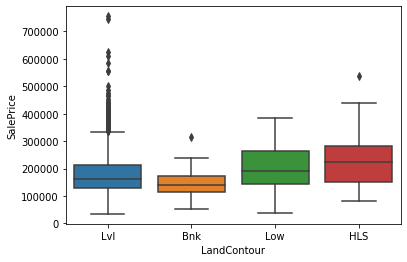

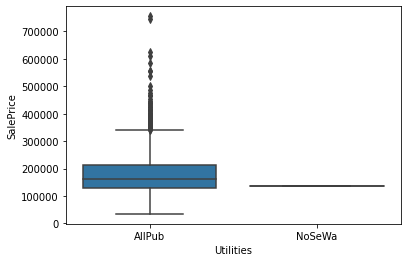

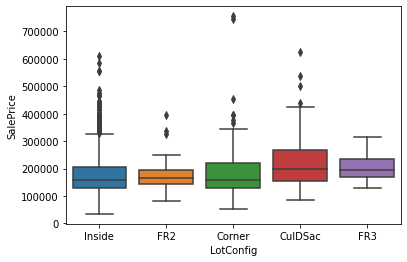

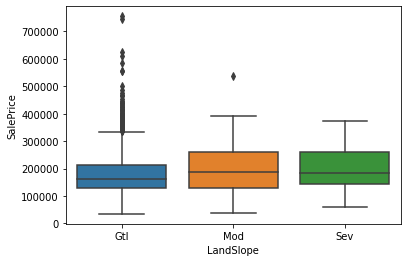

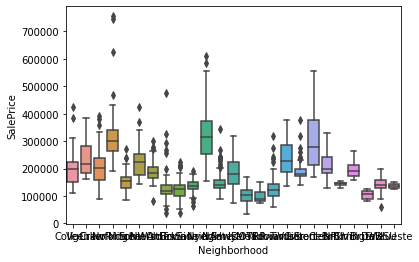

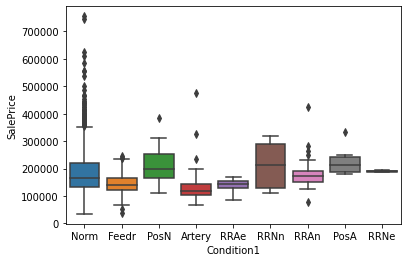

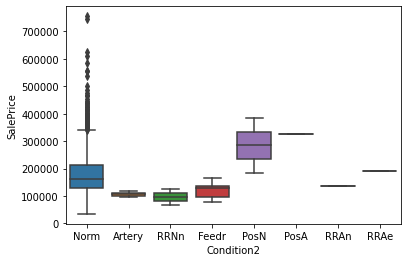

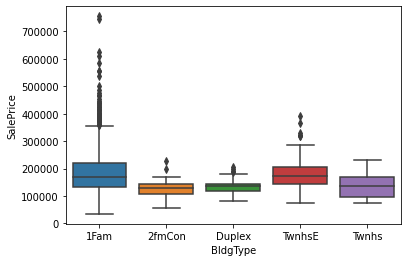

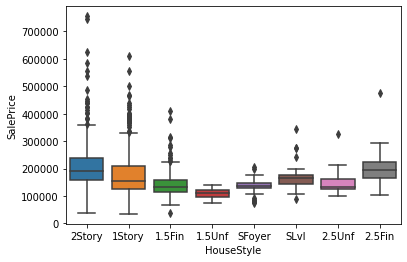

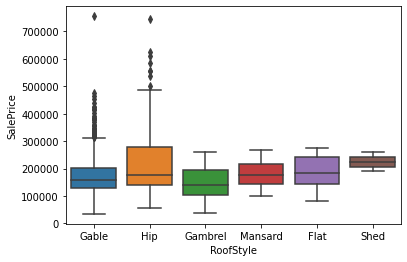

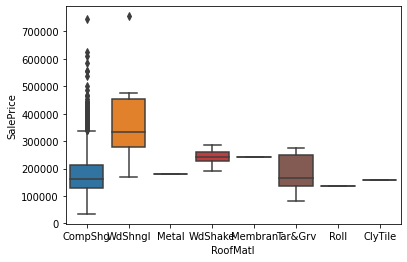

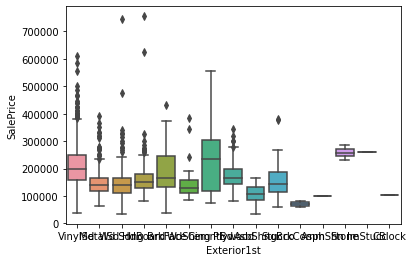

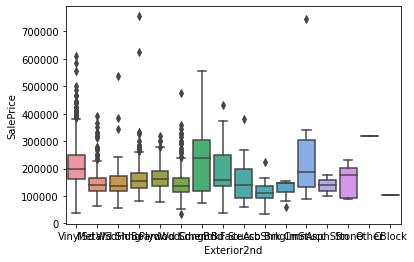

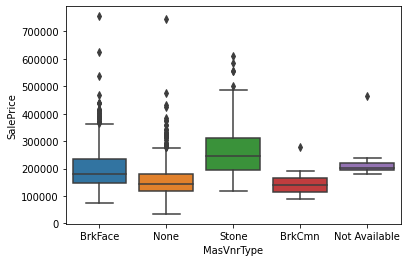

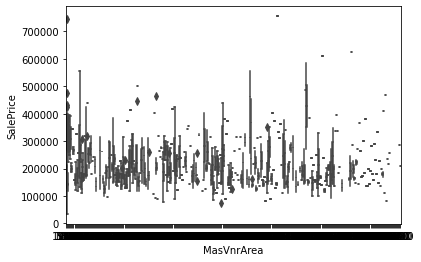

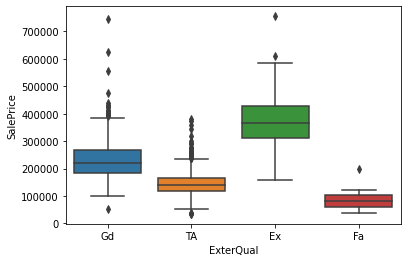

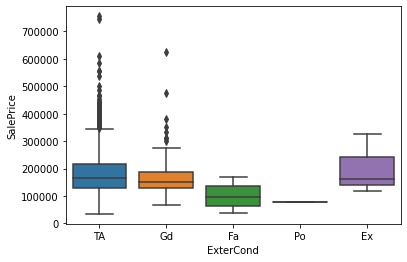

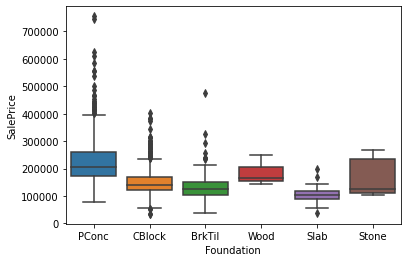

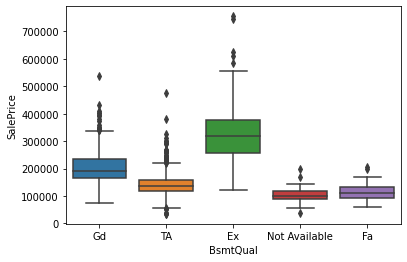

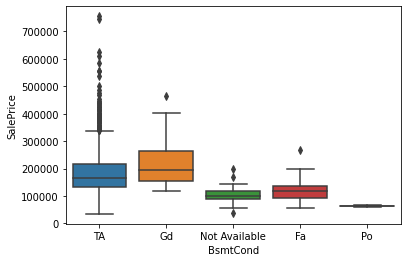

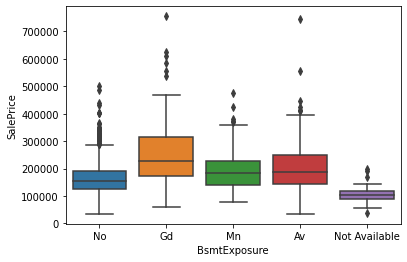

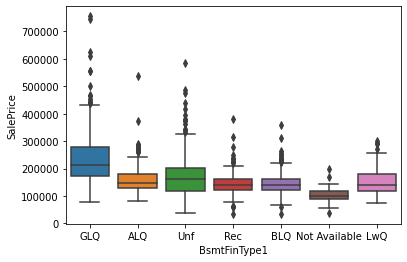

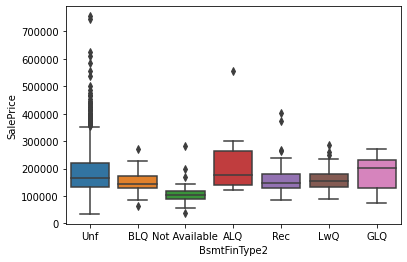

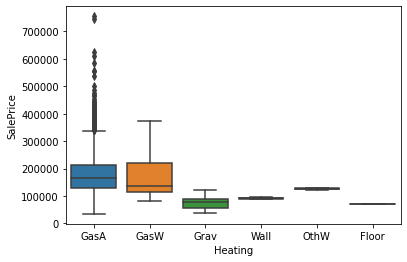

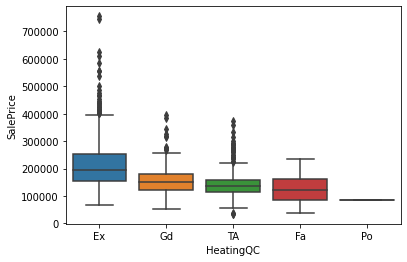

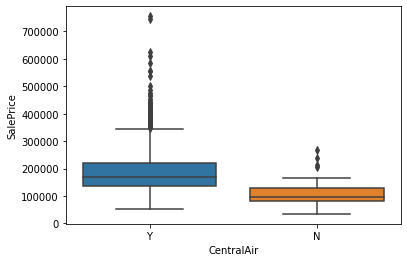

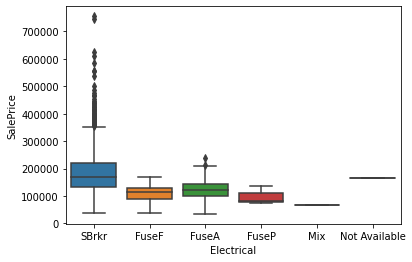

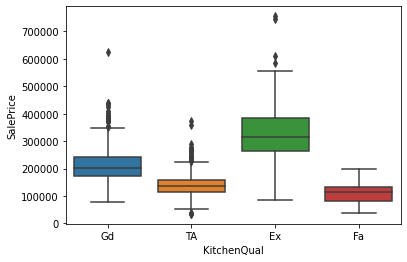

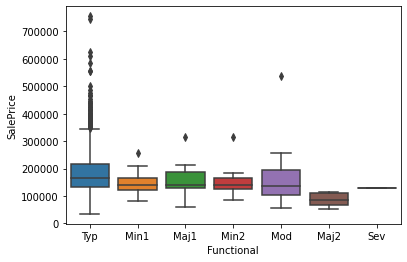

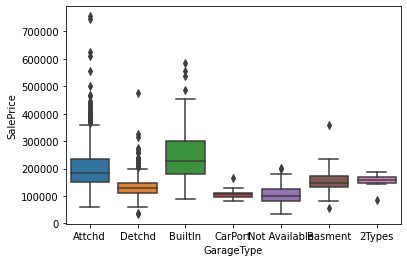

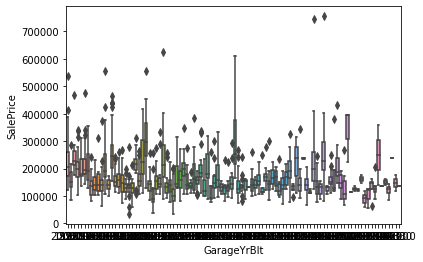

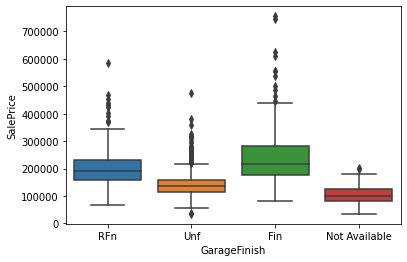

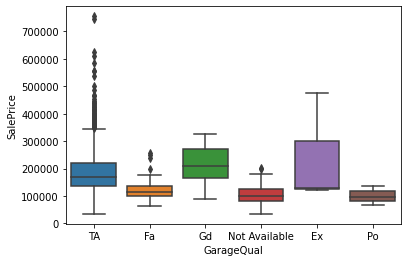

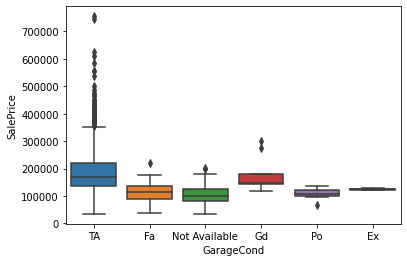

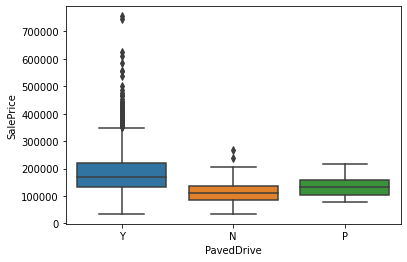

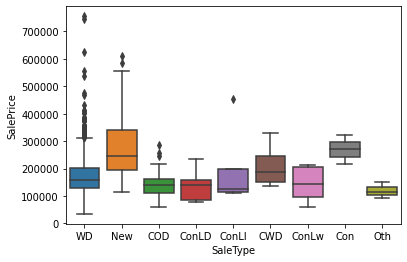

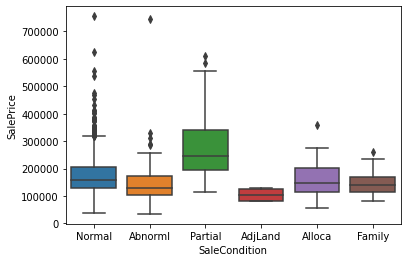

In [11]:
for col in  categorical_columns_list:       
    sns.boxplot(x=col,y='SalePrice',data=housing)
    plt.show()

### **Observations:**

1. **SalePrice** is high if **MsZoning** is **RL** and less if **MsZoning** is **C** 
2. **SalePrice** is comparitively high for **Street** type of **Pave**
3. **SalePrice** depends on **LandContour**
4. **SalePrice** clearly high if **Utilities** equal to **AllPub** 
5. **SalePrice** depends on **Neighborhood**
6. **SalePrice** depends on **HouseStyle, SaleType,BsmtCond, BsmtQual, Foundation, ExterCond,ExterQual,BsmtCond,BsmtQual,HeatingQC, CentralAir, Electrical, KitchenQual, GarageType, FireplaceQu, GarageFinish, GarageCond,SaleCondition, HouseStyle, BldgType, Condition1**


In [28]:
categorical_columns_list=["HouseStyle", "SaleType",'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond','ExterQual','BsmtCond','BsmtQual','HeatingQC', 'CentralAir', 'Electrical',  'GarageType', 'KitchenQual', 'GarageFinish', 'GarageCond','SaleCondition', 'HouseStyle', 
                          'BldgType', 'Condition1','Neighborhood','Utilities', 'LandContour', 'Street','MSZoning']

# **Preparing the data for Modeling**

* Encoding
    1. Converting binary variables to 1 or 0 
    2. Other categorical variables to dummy variables

* Splitting into train and test
* Rescaling of variables

In [29]:
columns= nummeric_columns_list + categorical_columns_list
columns

['TotalBsmtSF',
 'MSSubClass',
 'BsmtUnfSF',
 'PoolArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'GrLivArea',
 'Fireplaces',
 'GarageArea',
 'TotRmsAbvGrd',
 'LotArea',
 '2ndFlrSF',
 '1stFlrSF',
 'YearRemodAdd',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'FullBath',
 'MiscVal',
 'SalePrice',
 'HouseStyle',
 'SaleType',
 'BsmtCond',
 'BsmtQual',
 'Foundation',
 'ExterCond',
 'ExterQual',
 'BsmtCond',
 'BsmtQual',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'GarageType',
 'KitchenQual',
 'GarageFinish',
 'GarageCond',
 'SaleCondition',
 'HouseStyle',
 'BldgType',
 'Condition1',
 'Neighborhood',
 'Utilities',
 'LandContour',
 'Street',
 'MSZoning']

**Dummy variables**

In [60]:
# generating dummy variables for categorical variables and get new data set.
df = pd.get_dummies(housing[columns],columns=categorical_columns_list,drop_first=True)
df.head(5)

TotalBsmtSF  MSSubClass  BsmtUnfSF  PoolArea  BsmtFullBath  BsmtHalfBath  \
0          856          60        150         0             1             0   
1         1262          20        284         0             0             1   
2          920          60        434         0             1             0   
3          756          70        540         0             1             0   
4         1145          60        490         0             1             0   

   HalfBath  GrLivArea  Fireplaces  GarageArea  ...  Neighborhood_Veenker  \
0         1       1710           0         548  ...                     0   
1         0       1262           1         460  ...                     1   
2         1       1786           1         608  ...                     0   
3         0       1717           1         642  ...                     0   
4         1       2198           1         836  ...                     0   

   Utilities_NoSeWa  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                 0                0                0                1   
1                 0                0                0                1   
2                 0                0                0                1   
3                 0                0                0                1   
4                 0                0                0                1   

   Street_Pave  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  
0            1            0            0            1            0  
1            1            0            0            1            0  
2            1            0            0            1            0  
3            1            0            0            1            0  
4            1            0            0            1            0  

[5 rows x 180 columns]

**Splitting into train and test**

In [61]:
# train and test data split
df_train, df_test= train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 180)
(439, 180)


**Rescaling the Features:**

Scaling of variables is an important step because, as you may have noticed, the variable ‘temp’ is on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.

How to do it:

1. Min-Max scaling (normalisation): Between 0 and 1
2. Standardisation (mean=0, sigma=1)

In [62]:
#min max scaling the data
# normalisation: (x-xmin)/(xmax-xmin)
# standardisation:  (x- mu)/ sigma


In [63]:
#  using Normalisation method

# 1. Initialise an object
scaler= MinMaxScaler()
# 2. Fit on data
df_train[nummeric_columns_list]= scaler.fit_transform(df_train[nummeric_columns_list])
df_train.head()

TotalBsmtSF  MSSubClass  BsmtUnfSF  PoolArea  BsmtFullBath  \
318      0.220458    0.235294   0.154110       0.0      0.333333   
239      0.120295    0.176471   0.274401       0.0      0.000000   
986      0.079378    0.176471   0.207620       0.0      0.000000   
1416     0.127169    1.000000   0.332620       0.0      0.000000   
390      0.140917    0.176471   0.098031       0.0      0.333333   

      BsmtHalfBath  HalfBath  GrLivArea  Fireplaces  GarageArea  ...  \
318            0.0       0.5   0.424289    0.333333    0.462623  ...   
239            0.0       0.5   0.201576    0.333333    0.155148  ...   
986            0.0       0.0   0.230015    0.000000    0.179831  ...   
1416           0.0       0.0   0.355880    0.000000    0.394922  ...   
390            0.0       0.0   0.178517    0.000000    0.270804  ...   

      Neighborhood_Veenker  Utilities_NoSeWa  LandContour_HLS  \
318                      0                 0                0   
239                      0                 0                0   
986                      0                 0                0   
1416                     0                 0                0   
390                      0                 0                0   

      LandContour_Low  LandContour_Lvl  Street_Pave  MSZoning_FV  MSZoning_RH  \
318                 1                0            1            0            0   
239                 0                1            1            0            0   
986                 0                1            1            0            0   
1416                0                1            1            0            0   
390                 0                1            1            0            0   

      MSZoning_RL  MSZoning_RM  
318             1            0  
239             1            0  
986             0            1  
1416            0            1  
390             1            0  

[5 rows x 180 columns]

# **Training the model**

In [64]:
df_train.columns

Index(['TotalBsmtSF', 'MSSubClass', 'BsmtUnfSF', 'PoolArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'GrLivArea', 'Fireplaces', 'GarageArea',
       ...
       'Neighborhood_Veenker', 'Utilities_NoSeWa', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Street_Pave', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM'],
      dtype='object', length=180)

In [65]:
# X_train, y_train
y_train = df_train.pop('SalePrice')
X_train = df_train

print(y_train)

318     0.312595
239     0.108457
986     0.114012
1416    0.121650
390     0.116789
          ...   
802     0.213998
53      0.486182
350     0.393225
79      0.104291
792     0.326191
Name: SalePrice, Length: 1021, dtype: float64


In [66]:
X_train.shape

(1021, 179)

In [67]:
X_train.head(5)

TotalBsmtSF  MSSubClass  BsmtUnfSF  PoolArea  BsmtFullBath  \
318      0.220458    0.235294   0.154110       0.0      0.333333   
239      0.120295    0.176471   0.274401       0.0      0.000000   
986      0.079378    0.176471   0.207620       0.0      0.000000   
1416     0.127169    1.000000   0.332620       0.0      0.000000   
390      0.140917    0.176471   0.098031       0.0      0.333333   

      BsmtHalfBath  HalfBath  GrLivArea  Fireplaces  GarageArea  ...  \
318            0.0       0.5   0.424289    0.333333    0.462623  ...   
239            0.0       0.5   0.201576    0.333333    0.155148  ...   
986            0.0       0.0   0.230015    0.000000    0.179831  ...   
1416           0.0       0.0   0.355880    0.000000    0.394922  ...   
390            0.0       0.0   0.178517    0.000000    0.270804  ...   

      Neighborhood_Veenker  Utilities_NoSeWa  LandContour_HLS  \
318                      0                 0                0   
239                      0                 0                0   
986                      0                 0                0   
1416                     0                 0                0   
390                      0                 0                0   

      LandContour_Low  LandContour_Lvl  Street_Pave  MSZoning_FV  MSZoning_RH  \
318                 1                0            1            0            0   
239                 0                1            1            0            0   
986                 0                1            1            0            0   
1416                0                1            1            0            0   
390                 0                1            1            0            0   

      MSZoning_RL  MSZoning_RM  
318             1            0  
239             1            0  
986             0            1  
1416            0            1  
390             1            0  

[5 rows x 179 columns]

In [68]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'


lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train, y_train) # fit the model on the  features
    
    
    print(" lambda = " + str(i))
    
    
    #Computing the r2 score
    y_ridge_train_pred = ridgereg.predict(X_train)
    print("r2 score = " + str(r2_score(y_train, y_ridge_train_pred))) 
    print(" ")
    #print(ridgereg.coef_) # model coefficients

 lambda = 0
r2 score = 0.8584115517247346
 
 lambda = 0.001
r2 score = 0.8773199927915581
 
 lambda = 0.01
r2 score = 0.8773189399529098
 
 lambda = 0.1
r2 score = 0.8772691864517667
 
 lambda = 1
r2 score = 0.8755261960755194
 
 lambda = 10
r2 score = 0.8557554633826927
 
 lambda = 100
r2 score = 0.7460384456178207
 
 lambda = 1000
r2 score = 0.47554579381717177
 


In [69]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'


lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    
    lassoreg = Lasso(alpha = i) # Initialize the Lasso Regression model with a specific lambda
    lassoreg.fit(X_train, y_train) # fit the model on the  features
    
    
    print(" lambda = " + str(i))
    
    
    #Computing the r2 score
    y_lasso_train_pred = lassoreg.predict(X_train)
    print("r2 score = " + str(r2_score(y_train, y_lasso_train_pred))) 
    print(" ")
    #print(lassoreg.coef_) # model coefficients

 lambda = 0
r2 score = 0.8773199371177821
 
 lambda = 0.001
r2 score = 0.812042628840275
 
 lambda = 0.01
r2 score = 0.37644539515841746
 
 lambda = 0.1
r2 score = 0.0
 
 lambda = 1
r2 score = 0.0
 
 lambda = 10
r2 score = 0.0
 
 lambda = 100
r2 score = 0.0
 
 lambda = 1000
r2 score = 0.0
 


In [70]:
    ridgereg = Ridge(alpha = 0.001) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train, y_train) # fit the model on the  features
    
    
    print(" lambda = 0.001 " )
    
    
    #Computing the r2 score
    y_ridge_train_pred = ridgereg.predict(X_train)
    print("r2 score = " + str(r2_score(y_train, y_ridge_train_pred))) 
    print(" ")
    #print(ridgereg.coef_) # model coefficients

 lambda = 0.001 
r2 score = 0.8773199927915581
 


In [71]:
    lassoreg = Lasso(alpha = 0.001) # Initialize the Lasso Regression model with a specific lambda
    lassoreg.fit(X_train, y_train) # fit the model on the  features
    
    
    print(" lambda =  0.001")
    
    
    #Computing the r2 score
    y_lasso_train_pred = lassoreg.predict(X_train)
    print("r2 score = " + str(r2_score(y_train, y_lasso_train_pred))) 
    print(" ")
    #print(lassoreg.coef_) # model coefficients

 lambda =  0.001
r2 score = 0.812042628840275
 


In [72]:
betas = pd.DataFrame(index=X_train.columns, 
                     columns = ['Ridge', 'Lasso'])

betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas

Ridge     Lasso
TotalBsmtSF   0.027332  0.000000
MSSubClass   -0.028629 -0.019381
BsmtUnfSF    -0.003228  0.000000
PoolArea     -0.054474 -0.000000
BsmtFullBath  0.048783  0.037674
...                ...       ...
Street_Pave   0.030623  0.000000
MSZoning_FV   0.022426  0.000000
MSZoning_RH   0.037790 -0.000000
MSZoning_RL   0.034484  0.007255
MSZoning_RM   0.035464 -0.008826

[179 rows x 2 columns]

#**Predictions and evaluation on the test set**

In [73]:
#  Fit on data
df_test[nummeric_columns_list]= scaler.transform(df_test[nummeric_columns_list])
df_test.head()

TotalBsmtSF  MSSubClass  BsmtUnfSF  PoolArea  BsmtFullBath  \
1436     0.141408    0.000000   0.106164  0.000000      0.000000   
57       0.140753    0.235294   0.368151  0.000000      0.000000   
780      0.202455    0.000000   0.529538  0.000000      0.000000   
382      0.153682    0.235294   0.401969  0.000000      0.000000   
1170     0.179378    0.352941   0.245719  0.888889      0.333333   

      BsmtHalfBath  HalfBath  GrLivArea  Fireplaces  GarageArea  ...  \
1436           0.0       0.0   0.081860    0.000000    0.372355  ...   
57             0.0       0.5   0.246349    0.000000    0.398449  ...   
780            0.0       0.0   0.156610    0.333333    0.283498  ...   
382            0.0       0.5   0.261145    0.000000    0.450635  ...   
1170           0.0       0.0   0.130669    0.333333    0.252468  ...   

      Neighborhood_Veenker  Utilities_NoSeWa  LandContour_HLS  \
1436                     0                 0                0   
57                       0                 0                0   
780                      0                 0                0   
382                      0                 0                0   
1170                     0                 0                0   

      LandContour_Low  LandContour_Lvl  Street_Pave  MSZoning_FV  MSZoning_RH  \
1436                0                1            1            0            0   
57                  0                1            1            0            0   
780                 0                1            1            0            0   
382                 0                1            1            0            0   
1170                0                1            1            0            0   

      MSZoning_RL  MSZoning_RM  
1436            1            0  
57              1            0  
780             1            0  
382             1            0  
1170            1            0  

[5 rows x 180 columns]

In [74]:
df_test.describe()

TotalBsmtSF  MSSubClass   BsmtUnfSF    PoolArea  BsmtFullBath  \
count   439.000000  439.000000  439.000000  439.000000    439.000000   
mean      0.171326    0.195498    0.246305    0.006444      0.130600   
std       0.063409    0.233458    0.182297    0.078665      0.167510   
min       0.000000    0.000000    0.000000    0.000000      0.000000   
25%       0.133061    0.000000    0.109161    0.000000      0.000000   
50%       0.160884    0.176471    0.214041    0.000000      0.000000   
75%       0.204255    0.235294    0.346318    0.000000      0.333333   
max       0.413093    1.000000    0.828339    1.138889      0.666667   

       BsmtHalfBath    HalfBath   GrLivArea  Fireplaces  GarageArea  ...  \
count    439.000000  439.000000  439.000000  439.000000  439.000000  ...   
mean       0.026196    0.198178    0.205844    0.215642    0.335170  ...   
std        0.116540    0.254002    0.098175    0.213849    0.153518  ...   
min        0.000000    0.000000   -0.019985    0.000000    0.000000  ...   
25%        0.000000    0.000000    0.131245    0.000000    0.236953  ...   
50%        0.000000    0.000000    0.195619    0.333333    0.331453  ...   
75%        0.000000    0.500000    0.260761    0.333333    0.406206  ...   
max        1.000000    1.000000    0.609147    0.666667    0.880113  ...   

       Neighborhood_Veenker  Utilities_NoSeWa  LandContour_HLS  \
count                 439.0             439.0       439.000000   
mean                    0.0               0.0         0.034169   
std                     0.0               0.0         0.181869   
min                     0.0               0.0         0.000000   
25%                     0.0               0.0         0.000000   
50%                     0.0               0.0         0.000000   
75%                     0.0               0.0         0.000000   
max                     0.0               0.0         1.000000   

       LandContour_Low  LandContour_Lvl  Street_Pave  MSZoning_FV  \
count       439.000000       439.000000   439.000000   439.000000   
mean          0.015945         0.904328     0.995444     0.045558   
std           0.125407         0.294476     0.067420     0.208763   
min           0.000000         0.000000     0.000000     0.000000   
25%           0.000000         1.000000     1.000000     0.000000   
50%           0.000000         1.000000     1.000000     0.000000   
75%           0.000000         1.000000     1.000000     0.000000   
max           1.000000         1.000000     1.000000     1.000000   

       MSZoning_RH  MSZoning_RL  MSZoning_RM  
count   439.000000   439.000000   439.000000  
mean      0.006834     0.794989     0.145786  
std       0.082477     0.404171     0.353294  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 180 columns]

In [75]:
y_test= df_test.pop('SalePrice')
X_test= df_test

In [76]:
# Ridge

# predict
y_ridge_test_pred= ridgereg.predict(X_test)
# Evaluate
print(r2_score(y_true=y_test, y_pred=y_ridge_test_pred))

0.8417145344201924


In [77]:
# Lasso

# predict
y_Lasso_test_pred= lassoreg.predict(X_test)
# Evaluate
print(r2_score(y_true=y_test, y_pred=y_Lasso_test_pred))

0.7931286235467381


In [78]:
# Sorting by column "Ridge"
betas.sort_values(by=['Ridge'], ascending=False)

Ridge     Lasso
1stFlrSF          0.170571  0.000000
2ndFlrSF          0.159660  0.000000
GrLivArea         0.127460  0.218638
OverallQual       0.112655  0.201089
LotArea           0.109833  0.000000
...                    ...       ...
KitchenQual_TA   -0.045276 -0.016607
KitchenAbvGr     -0.047808 -0.000000
KitchenQual_Fa   -0.048174 -0.000000
Utilities_NoSeWa -0.053323 -0.000000
PoolArea         -0.054474 -0.000000

[179 rows x 2 columns]

In [79]:
# Sorting by column "Lasso"
betas.sort_values(by=['Lasso'], ascending=False)

Ridge     Lasso
GrLivArea             0.127460  0.218638
OverallQual           0.112655  0.201089
GarageArea            0.052000  0.068591
Neighborhood_NoRidge  0.076920  0.060525
Fireplaces            0.020223  0.044164
...                        ...       ...
BsmtQual_Gd          -0.012825 -0.012598
BsmtQual_TA          -0.011911 -0.013721
ExterQual_TA         -0.009338 -0.015082
KitchenQual_TA       -0.045276 -0.016607
MSSubClass           -0.028629 -0.019381

[179 rows x 2 columns]

-

  -

-

### **Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [80]:
ridgereg = Ridge(alpha = 0.002) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_train, y_train) # fit the model on the  features
    
    
print(" lambda = 0.002 " )
    
    
#Computing the r2 score
y_ridge_train_pred = ridgereg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_ridge_train_pred))) 



 lambda = 0.002 
r2 score = 0.8773199517913691


In [81]:
lassoreg = Lasso(alpha = 0.002) # Initialize the Lasso Regression model with a specific lambda
lassoreg.fit(X_train, y_train) # fit the model on the  features
    
    
print(" lambda = 0.002 " )
    
    
#Computing the r2 score
y_Lasso_train_pred = lassoreg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_Lasso_train_pred))) 

 lambda = 0.002 
r2 score = 0.7541865006735401


In [82]:
betas = pd.DataFrame(index=X_train.columns, 
                     columns = ['Ridge', 'Lasso'])

betas['Ridge'] = ridgereg.coef_ # Ridge Regression
betas['Lasso'] = lassoreg.coef_ # Lasso Regression


Top 10 features in Ridge

In [83]:
# Sorting by column "Ridge"
betas.sort_values(by=['Ridge'], ascending=False)

Ridge     Lasso
1stFlrSF          0.169360  0.000000
2ndFlrSF          0.159135  0.000000
GrLivArea         0.128731  0.106241
OverallQual       0.112663  0.196184
LotArea           0.109759  0.000000
...                    ...       ...
KitchenQual_TA   -0.045268 -0.010789
KitchenAbvGr     -0.047789 -0.000000
KitchenQual_Fa   -0.048161 -0.000000
Utilities_NoSeWa -0.053247 -0.000000
PoolArea         -0.054465  0.000000

[179 rows x 2 columns]

Top 10 features in Lasso

In [84]:
# Sorting by column "Lasso"
betas.sort_values(by=['Lasso'], ascending=False)

Ridge     Lasso
OverallQual           0.112663  0.196184
GrLivArea             0.128731  0.106241
GarageArea            0.051997  0.063637
Fireplaces            0.020233  0.051826
Neighborhood_NoRidge  0.076922  0.045747
...                        ...       ...
GarageFinish_Unf     -0.010608 -0.009938
KitchenQual_TA       -0.045268 -0.010789
BsmtQual_Gd          -0.012825 -0.012269
BsmtQual_TA          -0.011913 -0.014182
ExterQual_TA         -0.009342 -0.023846

[179 rows x 2 columns]

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [85]:
# Most important 5 predictors are:
imp_pred=['OverallQual', 'GrLivArea', 'GarageArea', 'Fireplaces', 'Neighborhood_NoRidge']
for x in imp_pred:
  X_train.pop(x)



In [86]:

lassoreg = Lasso(alpha = 0.001) # Initialize the Lasso Regression model with a specific lambda
lassoreg.fit(X_train, y_train) # fit the model on the  features
    
    
print(" lambda = 0.001 " )
    
    
#Computing the r2 score
y_Lasso_train_pred = lassoreg.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_Lasso_train_pred))) 

 lambda = 0.001 
r2 score = 0.7719952203424062


In [87]:
betas = pd.DataFrame(index=X_train.columns, 
                     columns = ['Lasso'])


betas['Lasso'] = lassoreg.coef_ # Lasso Regression
betas.sort_values(by=['Lasso'], ascending=False)

Lasso
1stFlrSF              0.346156
2ndFlrSF              0.152148
BsmtFullBath          0.043656
Neighborhood_NridgHt  0.041299
YearRemodAdd          0.021972
...                        ...
MSSubClass           -0.026558
KitchenQual_Gd       -0.026943
BsmtQual_TA          -0.029402
ExterQual_TA         -0.032084
KitchenQual_TA       -0.038678

[174 rows x 1 columns]